# EXPLORE THE CORRELATION RESULTS
The objective of this notebook is to explore the correlation results: see how many of each are kept after filtering with stricter conditions, see how many of them are shared between sample types and how many are unique, try and test differences in the correlation coefficient (for example) and, specially, look at the results of specific ARGs (rank I, the ones that we believe have followed the route, the ones we've detected through qPCR in waters), MGEs (idem) and zOTUs (core zOTUs, exclusive zOTUs, route zOTUs)

In [1]:
import os

import pandas as pd
from scipy import stats as stat
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import numpy as np
from matplotlib_venn import venn2, venn2_circles

import warnings
warnings.filterwarnings("ignore")

In [2]:
os.chdir("../results/Corr_res") # this is the same directory as the result directory

In [3]:
# z = zOTUs m = MGEs a = ARGs
usecols = list(range(1,6))
z_a_plas = pd.read_csv("ZAP_corrs.csv", usecols = usecols)
z_a_cont = pd.read_csv("ZAC_corrs.csv", usecols = usecols)
z_a_soil = pd.read_csv("ZAS_corrs.csv", usecols = usecols)

z_m_plas = pd.read_csv("ZMP_corrs.csv", usecols = usecols)
z_m_cont = pd.read_csv("ZMC_corrs.csv", usecols = usecols)
z_m_soil = pd.read_csv("ZMS_corrs.csv", usecols = usecols)

a_m_plas = pd.read_csv("AMP_corrs.csv", usecols = usecols)
a_m_cont = pd.read_csv("AMC_corrs.csv", usecols = usecols)
a_m_soil = pd.read_csv("AMS_corrs.csv", usecols = usecols)

del usecols
z_a_plas

,var1,var2,statistic,p-val,coef
0,zOTU_1,oleC,2.902131,0.0100,0.612881
1,zOTU_1,tetG_F,-3.289089,0.0100,-0.660224
2,zOTU_1,tetPA,-2.890784,0.0240,-0.611382
3,zOTU_100,Aac6-Aph2,-2.634670,0.0140,-0.575735
4,zOTU_100,ArmA,-5.005863,0.0020,-0.800977
...,...,...,...,...,...
27161,zOTU_990,fosb,-0.819808,0.4208,-0.214026
27162,zOTU_990,mcr-1,-0.687830,0.4740,-0.180801
27163,zOTU_990,nisB,-1.019891,0.3452,-0.262983
27164,zOTU_991,fabK,1.186784,0.2652,0.302338


Now I'm going to filtering and getting some basic umbers: how many, mean correlation coefficient

In [4]:
def filter_and_describe(original_df, name):
    """
    Highly hardcoded function to save time writing 6 times the same code. It takes one of the results dataframes and returns it filtered to p-val <= 0.01 and correlation coefficient >= 0.75,
    while also printing the mean, median and variance along the way of both the original df and the filtered df. When printing the stats of the original_df, it will filter it to only keep positive correlations
    - original_df = pandas df with a p-val column and a correlation-coef column.
    - name = the name of the dataset we want printed in the print statements
    Returns:
    - DataFrame filtered to values indicated above
    """
    filt_df = original_df.loc[(original_df["coef"] > 0) & (original_df["p-val"] <= 0.01)]
    print("There's ", filt_df.shape[0], " strong corrs in ", name, ". Mean coef is ", round(filt_df["coef"].mean(), 3), 
          " Median ", round(filt_df["coef"].median(), 3), 
          " Var ", round(filt_df["coef"].var(), 3))
    pos_df = original_df.loc[original_df["coef"] > 0]
    print("Without p-val filtering, there's ", pos_df.shape[0], " strong corrs in ", name, ". Mean coef is ", round(pos_df["coef"].mean(), 3), 
          " Median ", round(pos_df["coef"].median(), 3), 
          " Var ", round(pos_df["coef"].var(), 3))
    return filt_df

In [5]:
filt_zap = filter_and_describe(z_a_plas, "ZAP")
print("There are ", len(filt_zap["var2"].unique()), " unique ARGs that are correlated. Conversely, there are ", len(filt_zap["var1"].unique()), " unique zotus that are correlated")
print("")
filt_zac = filter_and_describe(z_a_cont, "ZAC")
print("There are ", len(filt_zac["var2"].unique()), " unique ARGs that are correlated. Conversely, there are ", len(filt_zac["var1"].unique()), " unique zotus that are correlated")
print("")
filt_zas = filter_and_describe(z_a_soil, "ZAS")
print("There are ", len(filt_zas["var2"].unique()), " unique ARGs that are correlated. Conversely, there are ", len(filt_zas["var1"].unique()), " unique zotus that are correlated")
print("")

filt_zmp = filter_and_describe(z_m_plas, "ZMP")
print("There are ", len(filt_zmp["var2"].unique()), " unique MGEs that are correlated. Conversely, there are ", len(filt_zmp["var1"].unique()), " unique zotus that are correlated")
print("")
filt_zmc = filter_and_describe(z_m_cont, "ZMC")
print("There are ", len(filt_zmc["var2"].unique()), " unique MGEs that are correlated. Conversely, there are ", len(filt_zac["var1"].unique()), " unique zotus that are correlated")
print("")
filt_zms = filter_and_describe(z_m_soil, "ZMS")
print("There are ", len(filt_zms["var2"].unique()), " unique MGEs that are correlated. Conversely, there are ", len(filt_zms["var1"].unique()), " unique zotus that are correlated")
print("")

filt_amp = filter_and_describe(a_m_plas, "AMP")
print("There are ", len(filt_amp["var2"].unique()), " unique MGEs that are correlated. Conversely, there are ", len(filt_amp["var1"].unique()), " unique ARGs that are correlated")
print("")
filt_amc = filter_and_describe(a_m_cont, "AMP")
print("There are ", len(filt_amc["var2"].unique()), " unique MGEs that are correlated. Conversely, there are ", len(filt_amc["var1"].unique()), " unique ARGs that are correlated")
print("")
filt_ams = filter_and_describe(a_m_soil, "AMS")
print("There are ", len(filt_ams["var2"].unique()), " unique MGEs that are correlated. Conversely, there are ", len(filt_ams["var1"].unique()), " unique ARGs that are correlated")
print("")

There's  6175  strong corrs in  ZAP . Mean coef is  0.773  Median  0.761  Var  0.009
Without p-val filtering, there's  12923  strong corrs in  ZAP . Mean coef is  0.647  Median  0.644  Var  0.024
There are  244  unique ARGs that are correlated. Conversely, there are  268  unique zotus that are correlated

There's  7900  strong corrs in  ZAC . Mean coef is  0.903  Median  0.897  Var  0.005
Without p-val filtering, there's  17947  strong corrs in  ZAC . Mean coef is  0.86  Median  0.857  Var  0.008
There are  129  unique ARGs that are correlated. Conversely, there are  213  unique zotus that are correlated

There's  174  strong corrs in  ZAS . Mean coef is  0.913  Median  0.906  Var  0.0
Without p-val filtering, there's  19031  strong corrs in  ZAS . Mean coef is  0.694  Median  0.788  Var  0.037
There are  76  unique ARGs that are correlated. Conversely, there are  45  unique zotus that are correlated

There's  1203  strong corrs in  ZMP . Mean coef is  0.774  Median  0.752  Var  0.009


In [6]:
filt_zap.to_csv("plastic_resistances.csv")
filt_zac.to_csv("control_resistances.csv")
filt_zas.to_csv("soil_resistances.csv")

antib_data = pd.read_csv("../../data/metadata/assay_metadata.csv")[["Assay", "antib"]]
antib_data.rename(columns = {"Assay": "var2"}, inplace = True)
resis_names = filt_zap.merge(antib_data, on = "var2")["antib"].unique()
print("ZAP: ", sorted(list(resis_names)))
resis_names = filt_zac.merge(antib_data, on = "var2")["antib"].unique()
print("ZAC: ", sorted(list(resis_names)))
resis_names = filt_zas.merge(antib_data, on = "var2")["antib"].unique()
print("ZAS: ", sorted(list(resis_names)))

antib_data.rename(columns = {"ARG": "var2"}, inplace = True) #should be something more like transp names, but w/e
resis_names = filt_zmp.merge(antib_data, on = "var2")["antib"].unique()
print("ZMP: ", sorted(list(resis_names)))
resis_names = filt_zmc.merge(antib_data, on = "var2")["antib"].unique()
print("ZAC: ", sorted(list(resis_names)))
resis_names = filt_zms.merge(antib_data, on = "var2")["antib"].unique()
print("ZMS: ", sorted(list(resis_names)))


ZAP:  ['Aminoglycoside', 'Amphenicol', 'Beta Lactam', 'Fluoroquinolone', 'MDR', 'MLSB', 'Other', 'Sulfonamide', 'Tetracycline', 'Trimethoprim', 'Vancomycin']
ZAC:  ['Aminoglycoside', 'Amphenicol', 'Beta Lactam', 'Fluoroquinolone', 'MDR', 'MLSB', 'Sulfonamide', 'Tetracycline', 'Trimethoprim', 'Vancomycin']
ZAS:  ['Aminoglycoside', 'Amphenicol', 'Beta Lactam', 'Fluoroquinolone', 'MDR', 'MLSB', 'Other', 'Sulfonamide', 'Tetracycline', 'Trimethoprim', 'Vancomycin']
ZMP:  ['Insertional', 'Integrase', 'MGE', 'Plasmid', 'Plasmid-inc', 'Transposase']
ZAC:  ['Insertional', 'Integrase', 'MGE', 'Plasmid', 'Plasmid-inc', 'Transposase']
ZMS:  ['Insertional', 'Integrase', 'MGE', 'Plasmid-inc', 'Transposase']


Mind you, it is more interesting to see which correlations are shared between soil and plastics and which are exclusive than to just see how many each side has. So let's produce some venn diagrams  

In [7]:
##### ZA, soil ####
print("Shared zOTU-ARG between plastics and soil")
print(len(set(filt_zap["var1"] + "+" + filt_zap["var2"]) & set(filt_zas["var1"] + "+" + filt_zas["var2"])))
##### ZA, control ####
print("Shared zOTU-ARG between plastics and surrounding env")
print(len(set(filt_zap["var1"] + "+" + filt_zap["var2"]) & set(filt_zac["var1"] + "+" + filt_zac["var2"])))

##### ZM, soil ####
print("Shared zOTU-MGE between plastics and soil")
print(len(set(filt_zmp["var1"] + "+" + filt_zmp["var2"]) & set(filt_zms["var1"] + "+" + filt_zms["var2"])))
##### ZM, control ####
print("Shared zOTU-MGE between plastics and surrounding env")
print(len(set(filt_zmp["var1"] + "+" + filt_zmp["var2"]) & set(filt_zmc["var1"] + "+" + filt_zmc["var2"])))

##### AM, soil ####
print("Shared ARG-MGE between plastics and soil")
#print(set(filt_amp["var1"] + "+" + filt_amp["var2"]) & set(filt_ams["var1"] + "+" + filt_ams["var2"]))
print(len(set(filt_amp["var1"] + "+" + filt_amp["var2"]) & set(filt_ams["var1"] + "+" + filt_ams["var2"])))
##### AM, control ####
print("Shared zOTU-ARG between plastics and surrounding env")
#print(set(filt_amp["var1"] + "+" + filt_amp["var2"]) & set(filt_ams["var1"] + "+" + filt_ams["var2"]))
print(len(set(filt_amp["var1"] + "+" + filt_amp["var2"]) & set(filt_amc["var1"] + "+" + filt_amc["var2"])))

Shared zOTU-ARG between plastics and soil
2
Shared zOTU-ARG between plastics and surrounding env
444
Shared zOTU-MGE between plastics and soil
1
Shared zOTU-MGE between plastics and surrounding env
84
Shared ARG-MGE between plastics and soil
71
Shared zOTU-ARG between plastics and surrounding env
574


Seeing the situation, I'm going to produce a Venn diagram for each of the control corrs

It seems there are significant differences between groups in all cases. However, I'm going to ignore the soil resistances because there's so little I'll probably just ignore them until I get to the core analysis part. So, lets see if there truly are differences between controls and plastics

In [8]:
def statistic(x, y, axis):
    return np.mean(x, axis=axis) - np.mean(y, axis=axis)

In [9]:
filt_zap["type_g"] = "plas"
filt_zap["correlating"] = "z-a" #correlating: what did we originally correlate. Useful later to separate along the x axis different correlations
filt_zac["type_g"] = "cont"
filt_zac["correlating"] = "z-a"
filt_zas["type_g"] = "soil"
filt_zas["correlating"] = "z-a"
filt_zmp["type_g"] = "plas"
filt_zmp["correlating"] = "z-m"
filt_zmc["type_g"] = "cont"
filt_zmc["correlating"] = "z-m"
filt_zms["type_g"] = "soil"
filt_zms["correlating"] = "z-m"
filt_amp["type_g"] = "plas"
filt_amp["correlating"] = "a-m"
filt_amc["type_g"] = "cont"
filt_amc["correlating"] = "a-m"
filt_ams["type_g"] = "soil"
filt_ams["correlating"] = "a-m"

interest_cols = ["coef", "type_g", "correlating"]
sns_df = pd.concat([filt_zas[interest_cols], filt_zap[interest_cols]])
sns_df = pd.concat([sns_df, filt_zac[interest_cols]])
sns_df = pd.concat([sns_df, filt_zmp[interest_cols]])
sns_df = pd.concat([sns_df, filt_zms[interest_cols]])
sns_df = pd.concat([sns_df, filt_zmc[interest_cols]])
sns_df = pd.concat([sns_df, filt_amp[interest_cols]])
sns_df = pd.concat([sns_df, filt_ams[interest_cols]])
sns_df = pd.concat([sns_df, filt_amc[interest_cols]])


In [10]:
print("Are there any differences in the mean correlation coefficient between plastics and soil for a determined correlation type?")
print("#### ZA ####")
print(stat.shapiro(sns_df.loc[(sns_df["type_g"] == "plas") & (sns_df["correlating"] == "z-a")]["coef"]))
print(stat.shapiro(sns_df.loc[(sns_df["type_g"] == "cont") & (sns_df["correlating"] == "z-a")]["coef"]))
print(stat.levene(sns_df.loc[(sns_df["type_g"] == "cont") & (sns_df["correlating"] == "z-a")]["coef"], sns_df.loc[(sns_df["type_g"] == "plas") & (sns_df["correlating"] == "z-a")]["coef"]))
print(stat.permutation_test((sns_df.loc[(sns_df["type_g"] == "cont") & (sns_df["correlating"] == "z-a")]["coef"], sns_df.loc[(sns_df["type_g"] == "plas") & (sns_df["correlating"] == "z-a")]["coef"]), 
                     statistic, n_resamples = 9999))
#print(stat.ttest_ind(sns_df.loc[(sns_df["type_g"] == "cont") & (sns_df["correlating"] == "z-a")]["coef"], sns_df.loc[(sns_df["type_g"] == "plas") & (sns_df["correlating"] == "z-a")]["coef"], equal_var = False))
print("")

print("#### ZM ####")
print(stat.shapiro(sns_df.loc[(sns_df["type_g"] == "plas") & (sns_df["correlating"] == "z-m")]["coef"]))
print(stat.shapiro(sns_df.loc[(sns_df["type_g"] == "cont") & (sns_df["correlating"] == "z-m")]["coef"]))
print(stat.levene(sns_df.loc[(sns_df["type_g"] == "cont") & (sns_df["correlating"] == "z-m")]["coef"], sns_df.loc[(sns_df["type_g"] == "plas") & (sns_df["correlating"] == "z-m")]["coef"]))
print(stat.permutation_test((sns_df.loc[(sns_df["type_g"] == "cont") & (sns_df["correlating"] == "z-m")]["coef"], sns_df.loc[(sns_df["type_g"] == "plas") & (sns_df["correlating"] == "a-m")]["coef"]), 
                     statistic, n_resamples = 9999))
print("")
print("#### AM ####")
print(stat.shapiro(sns_df.loc[(sns_df["type_g"] == "plas") & (sns_df["correlating"] == "a-m")]["coef"]))
print(stat.shapiro(sns_df.loc[(sns_df["type_g"] == "cont") & (sns_df["correlating"] == "a-m")]["coef"]))
print(stat.levene(sns_df.loc[(sns_df["type_g"] == "cont") & (sns_df["correlating"] == "a-m")]["coef"], sns_df.loc[(sns_df["type_g"] == "plas") & (sns_df["correlating"] == "a-m")]["coef"]))
print(stat.permutation_test((sns_df.loc[(sns_df["type_g"] == "cont") & (sns_df["correlating"] == "a-m")]["coef"], sns_df.loc[(sns_df["type_g"] == "plas") & (sns_df["correlating"] == "a-m")]["coef"]), 
                     statistic, n_resamples = 9999))
print("")

Are there any differences in the mean correlation coefficient between plastics and soil for a determined correlation type?
#### ZA ####
ShapiroResult(statistic=0.9752779494887833, pvalue=2.122076601521036e-31)
ShapiroResult(statistic=0.9181790616015763, pvalue=4.4225030853216235e-54)
LeveneResult(statistic=394.84441938682755, pvalue=1.1220537039814233e-86)
PermutationTestResult(statistic=0.12943493908888604, pvalue=0.0002, null_distribution=array([ 1.54374854e-03,  3.55959674e-03, -5.92230751e-05, ...,
       -6.12093545e-04, -1.54815617e-03, -1.62378063e-03]))

#### ZM ####
ShapiroResult(statistic=0.9527745134648494, pvalue=3.114088285760649e-19)
ShapiroResult(statistic=0.8976161462042717, pvalue=2.7030691097024166e-29)
LeveneResult(statistic=77.5494526895732, pvalue=2.3295128065799115e-18)
PermutationTestResult(statistic=0.04505359170586487, pvalue=0.0002, null_distribution=array([ 0.00405325, -0.00257879, -0.0008777 , ..., -0.00479121,
        0.002163  ,  0.00419796]))

#### AM ###

Finally, we're interested in checking whether there is any extreme correlation. I.e., rho > 0.95

In [11]:
print("How many correlations have a coefficient above 95%?")
print(sns_df.loc[sns_df["coef"] > 0.95].shape[0])
print("##### ZAP #####")
print(len(filt_zap.loc[filt_zap["coef"] > 0.95][["var1", "var2", "coef"]]))
#print(filt_zap.loc[filt_zap["coef"] > 0.95][["var1", "var2", "coef"]])
print("##### ZAC #####")
print(len(filt_zac.loc[filt_zac["coef"] > 0.95][["var1", "var2", "coef"]]))
#print(filt_zac.loc[filt_zac["coef"] > 0.95][["var1", "var2", "coef"]])
print("##### ZMP #####")
print(len(filt_zmp.loc[filt_zmp["coef"] > 0.95][["var1", "var2", "coef"]]))
#print(filt_zmp.loc[filt_zmp["coef"] > 0.95][["var1", "var2", "coef"]])
print("##### ZMC #####")
print(len(filt_zmc.loc[filt_zmc["coef"] > 0.95][["var1", "var2", "coef"]]))
#print(filt_zmc.loc[filt_zmc["coef"] > 0.95][["var1", "var2", "coef"]])
print("##### AMP #####")
print(len(filt_amp.loc[filt_amp["coef"] > 0.95][["var1", "var2", "coef"]]))
#print(filt_amp.loc[filt_amp["coef"] > 0.95][["var1", "var2", "coef"]])
print("##### AMC #####")
print(len(filt_amc.loc[filt_amc["coef"] > 0.95][["var1", "var2", "coef"]]))
#print(filt_amc.loc[filt_amc["coef"] > 0.95][["var1", "var2", "coef"]])

How many correlations have a coefficient above 95%?
6098
##### ZAP #####
213
##### ZAC #####
3042
##### ZMP #####
49
##### ZMC #####
544
##### AMP #####
1256
##### AMC #####
822


Beyond general conclusions, we can start to focus on more specific results.  

## CORE RESISTOME AND CORRELATIONS
Let's go back to the first step and repeat everything. However, this time we'll keep only those correlations with the core resistome

In [12]:
# I'm introducing each core manually 
plastic_core = ["zOTU_150", "zOTU_22", "zOTU_33", "zOTU_8", "zOTU_504", "zOTU_204", "zOTU_330", "zOTU_396",
                "zOTU_464", "zOTU_109", "zOTU_66", "zOTU_149", "zOTU_633", "zOTU_668", "zOTU_359", "zOTU_168",
                "zOTU_19", "zOTU_355", "zOTU_144", "zOTU_205", "zOTU_275", "zOTU_2", "zOTU_1289", "zOTU_474", 
                "zOTU_27", "zOTU_23", "zOTU_130", "zOTU_324", "zOTU_9", "zOTU_106", "zOTU_64", "zOTU_315", 
                "zOTU_133", "zOTU_88", "zOTU_480", "zOTU_1081", "zOTU_639", "zOTU_41", "zOTU_18", "zOTU_185",
                "zOTU_467", "zOTU_114", "zOTU_72", "zOTU_174", "zOTU_1", "zOTU_137"]
cont_core = ["zOTU_2", "zOTU_183", "zOTU_622", "zOTU_3", "zOTU_72", "zOTU_1"]

core_zap = z_a_plas.loc[z_a_plas["var1"].isin(plastic_core)]# I'm going back to this step to get the print of the descriptive stats
core_zap = filter_and_describe(core_zap, "ZAP")
print("There are ", len(core_zap["var2"].unique()), " unique ARGs that are correlated. Conversely, there are ", len(core_zap["var1"].unique()), " unique core zotus that are correlated")
core_zac = z_a_cont.loc[z_a_soil["var1"].isin(cont_core)]
core_zac = filter_and_describe(core_zac, "ZAC")
print("There are ", len(core_zac["var2"].unique()), " unique ARGs that are correlated. Conversely, there are ", len(core_zac["var1"].unique()), " unique core zotus that are correlated")
print("")
core_zmp = z_m_plas.loc[z_m_plas["var1"].isin(plastic_core)]# I'm going back to this step to get the print of the descriptive stats
core_zmp = filter_and_describe(core_zmp, "ZMP")
print("There are ", len(core_zmp["var2"].unique()), " unique MGEs that are correlated. Conversely, there are ", len(core_zmp["var1"].unique()), " unique core zotus that are correlated")
core_zmc = z_m_cont.loc[z_m_cont["var1"].isin(cont_core)]
core_zmc = filter_and_describe(core_zmc, "ZMC")
print("There are ", len(core_zmc["var2"].unique()), " unique MGEs that are correlated. Conversely, there are ", len(core_zmc["var1"].unique()), " unique core zotus that are correlated")

There's  219  strong corrs in  ZAP . Mean coef is  0.764  Median  0.781  Var  0.004
Without p-val filtering, there's  365  strong corrs in  ZAP . Mean coef is  0.65  Median  0.684  Var  0.029
There are  211  unique ARGs that are correlated. Conversely, there are  7  unique core zotus that are correlated
There's  213  strong corrs in  ZAC . Mean coef is  0.856  Median  0.845  Var  0.003
Without p-val filtering, there's  448  strong corrs in  ZAC . Mean coef is  0.84  Median  0.845  Var  0.007
There are  73  unique ARGs that are correlated. Conversely, there are  8  unique core zotus that are correlated

There's  41  strong corrs in  ZMP . Mean coef is  0.776  Median  0.789  Var  0.004
Without p-val filtering, there's  248  strong corrs in  ZMP . Mean coef is  0.387  Median  0.295  Var  0.039
There are  40  unique MGEs that are correlated. Conversely, there are  2  unique core zotus that are correlated
There's  11  strong corrs in  ZMC . Mean coef is  0.783  Median  0.788  Var  0.0
Witho

In [13]:
core_zap["type_g"] = "plas"
core_zap["correlating"] = "z-a" #correlating: what did we originally correlate. Useful later to separate along the x axis different correlations
core_zac["type_g"] = "cont"
core_zac["correlating"] = "z-a"
core_zmp["type_g"] = "plas"
core_zmp["correlating"] = "z-m"
core_zmc["type_g"] = "cont"
core_zmc["correlating"] = "z-m"

interest_cols = ["coef", "type_g", "correlating"]
sns_df = pd.concat([core_zac[interest_cols], core_zap[interest_cols]])
sns_df = pd.concat([sns_df, core_zmp[interest_cols]])
sns_df = pd.concat([sns_df, core_zmc[interest_cols]])

sns_df

,coef,type_g,correlating
21,0.941176,cont,z-a
24,0.985294,cont,z-a
29,0.985294,cont,z-a
32,0.941176,cont,z-a
33,1.000000,cont,z-a
...,...,...,...
4379,0.776450,cont,z-m
4380,0.776450,cont,z-m
4381,0.788038,cont,z-m
4386,0.788038,cont,z-m


In [14]:
##### ZA ####
print(set(core_zap["var1"] + core_zap["var2"]) & set(core_zac["var1"] + core_zac["var2"]))
##### ZM ####
print(set(core_zmp["var1"] + core_zmp["var2"]) & set(core_zmc["var1"] + core_zmc["var2"]))

set()
set()


In [15]:
print("#### ZA ####")
print(stat.shapiro(sns_df.loc[(sns_df["type_g"] == "plas") & (sns_df["correlating"] == "z-a")]["coef"]))
print(stat.shapiro(sns_df.loc[(sns_df["type_g"] == "cont") & (sns_df["correlating"] == "z-a")]["coef"]))
print(stat.levene(sns_df.loc[(sns_df["type_g"] == "cont") & (sns_df["correlating"] == "z-a")]["coef"], sns_df.loc[(sns_df["type_g"] == "plas") & (sns_df["correlating"] == "z-a")]["coef"]))
print(stat.permutation_test((sns_df.loc[(sns_df["type_g"] == "cont") & (sns_df["correlating"] == "z-a")]["coef"], sns_df.loc[(sns_df["type_g"] == "plas") & (sns_df["correlating"] == "z-a")]["coef"]), 
                     statistic, n_resamples = 9999))
print("")

print("#### ZM ####")
print(stat.shapiro(sns_df.loc[(sns_df["type_g"] == "plas") & (sns_df["correlating"] == "z-m")]["coef"]))
print(stat.shapiro(sns_df.loc[(sns_df["type_g"] == "cont") & (sns_df["correlating"] == "z-m")]["coef"]))
print(stat.levene(sns_df.loc[(sns_df["type_g"] == "cont") & (sns_df["correlating"] == "z-m")]["coef"], sns_df.loc[(sns_df["type_g"] == "plas") & (sns_df["correlating"] == "z-m")]["coef"]))
print(stat.permutation_test((sns_df.loc[(sns_df["type_g"] == "cont") & (sns_df["correlating"] == "z-m")]["coef"], sns_df.loc[(sns_df["type_g"] == "plas") & (sns_df["correlating"] == "z-m")]["coef"]), 
                     statistic, n_resamples = 9999))
print("")

#### ZA ####
ShapiroResult(statistic=0.9396351839525732, pvalue=7.083416083253735e-08)
ShapiroResult(statistic=0.8823323741386174, pvalue=7.901902335015993e-12)
LeveneResult(statistic=11.325636854303198, pvalue=0.0008330597649222978)
PermutationTestResult(statistic=0.09286543780335332, pvalue=0.0002, null_distribution=array([ 0.00176929, -0.00729042,  0.00226463, ..., -0.00550828,
        0.00864424, -0.0017157 ]))

#### ZM ####
ShapiroResult(statistic=0.9323726307818688, pvalue=0.017325869722218664)
ShapiroResult(statistic=0.6491717529774246, pvalue=0.00010517336909444096)
LeveneResult(statistic=12.594380426063243, pvalue=0.000852652855457337)
PermutationTestResult(statistic=0.006450755125450125, pvalue=0.7516, null_distribution=array([ 0.01467394, -0.02207106, -0.01937532, ...,  0.02918596,
       -0.00933958, -0.00326336]))



In [16]:
print(sns_df.loc[sns_df["coef"] > 0.95].shape[0])
print("##### ZAP #####")
print(core_zap.loc[core_zap["coef"] > 0.95][["var1", "var2", "coef"]])
print("##### ZAS #####")
print(core_zac.loc[core_zac["coef"] > 0.95][["var1", "var2", "coef"]])
print("##### ZMP #####")
print(core_zmp.loc[core_zmp["coef"] > 0.95][["var1", "var2", "coef"]])
print("##### ZMS #####")
print(core_zmc.loc[core_zmc["coef"] > 0.95][["var1", "var2", "coef"]])

19
##### ZAP #####
Empty DataFrame
Columns: [var1, var2, coef]
Index: []
##### ZAS #####
            var1     var2      coef
24     zOTU_1005  aadA_99  0.985294
29     zOTU_1005  ant6-ib  0.985294
33     zOTU_1005   bl1acc  1.000000
36     zOTU_1005   blaGES  0.955882
39     zOTU_1005   blaLEN  0.955882
40     zOTU_1005   blaOCH  0.955882
42     zOTU_1005    catA1  0.955882
50     zOTU_1005   dfrA10  0.955882
55     zOTU_1005   erm(B)  0.955882
67     zOTU_1005     mefA  0.955882
85     zOTU_1005     tetX  0.955882
86     zOTU_1005     vanA  0.955882
24795   zOTU_757    QnrB4  0.955882
24808   zOTU_757  ant6-ib  0.985294
24812   zOTU_757   bl1acc  1.000000
24815   zOTU_757   blaGES  0.955882
24819   zOTU_757   blaOCH  0.955882
24823   zOTU_757    catB9  0.955882
24829   zOTU_757   dfrA10  0.955882
##### ZMP #####
Empty DataFrame
Columns: [var1, var2, coef]
Index: []
##### ZMS #####
Empty DataFrame
Columns: [var1, var2, coef]
Index: []


## RANK I ARGs
Same idea, this time focusing on just rank I ARGs

In [17]:
# I'm going to introduce rank I ARGs manually beacause there's not much of them
one_args = ["aadE", "floR", "blaZ", "mecA", "mepA", "dfrA1", "dfrA12", 
            "bacA", "qnrA", "norA", "ermT", "mphB", "lnuA", "lnuB",
           "mphA", "tetL", "tetM", "dfrA15", "dfrA25"]
print(one_args)

['aadE', 'floR', 'blaZ', 'mecA', 'mepA', 'dfrA1', 'dfrA12', 'bacA', 'qnrA', 'norA', 'ermT', 'mphB', 'lnuA', 'lnuB', 'mphA', 'tetL', 'tetM', 'dfrA15', 'dfrA25']


In order to get the very basic "how many of all possible" percentage, we first need to know how many does "all possible" entail. I.e.: see how many rank I ARGs we can find in each typology

In [18]:
print("There are ", len(z_a_plas.loc[z_a_plas["var2"].isin(one_args)]["var2"].unique()), "rank I ARGs in plastic samples")
print("There are ", len(z_a_cont.loc[z_a_cont["var2"].isin(one_args)]["var2"].unique()), "rank I ARGs in soil samples")

There are  10 rank I ARGs in plastic samples
There are  7 rank I ARGs in soil samples


In [19]:
one_zap = z_a_plas.loc[z_a_plas["var2"].isin(one_args)]# I'm going back to this step to get the print of the descriptive stats
one_zap = filter_and_describe(one_zap, "ZAP")
one_zac = z_a_cont.loc[z_a_cont["var2"].isin(one_args)]
one_zac = filter_and_describe(one_zac, "ZAC")
print("")
one_amp = a_m_plas.loc[a_m_plas["var1"].isin(one_args)]# I'm going back to this step to get the print of the descriptive stats
one_amp = filter_and_describe(one_amp, "AMP")
one_amc = a_m_cont.loc[a_m_cont["var1"].isin(one_args)]
one_amc = filter_and_describe(one_amc, "AMC")

There's  247  strong corrs in  ZAP . Mean coef is  0.776  Median  0.765  Var  0.01
Without p-val filtering, there's  727  strong corrs in  ZAP . Mean coef is  0.536  Median  0.542  Var  0.046
There's  228  strong corrs in  ZAC . Mean coef is  0.903  Median  0.897  Var  0.005
Without p-val filtering, there's  692  strong corrs in  ZAC . Mean coef is  0.839  Median  0.84  Var  0.009

There's  273  strong corrs in  AMP . Mean coef is  0.861  Median  0.871  Var  0.007
Without p-val filtering, there's  291  strong corrs in  AMP . Mean coef is  0.843  Median  0.865  Var  0.012
There's  32  strong corrs in  AMC . Mean coef is  0.986  Median  1.0  Var  0.001
Without p-val filtering, there's  127  strong corrs in  AMC . Mean coef is  0.779  Median  0.84  Var  0.042


In [20]:
one_zap["type_g"] = "plas"
one_zap["correlating"] = "z-a" #correlating: what did we originally correlate. Useful later to separate along the x axis different correlations
one_zac["type_g"] = "cont"
one_zac["correlating"] = "z-a"
one_amp["type_g"] = "plas"
one_amp["correlating"] = "a-m"
one_amc["type_g"] = "cont"
one_amc["correlating"] = "a-m"

interest_cols = ["coef", "type_g", "correlating"]
sns_df = pd.concat([one_zac[interest_cols], one_zap[interest_cols]])
sns_df = pd.concat([sns_df, one_amc[interest_cols]])
sns_df = pd.concat([sns_df, one_amp[interest_cols]])

sns_df

,coef,type_g,correlating
179,0.985294,cont,z-a
231,0.985294,cont,z-a
449,0.955882,cont,z-a
534,0.985294,cont,z-a
589,0.985294,cont,z-a
...,...,...,...
7864,0.943137,plas,a-m
7865,0.918014,plas,a-m
7866,0.865875,plas,a-m
7867,0.921738,plas,a-m


In [21]:
##### AM ####
print(set(one_amp["var1"] + one_amp["var2"]) & set(one_amc["var1"] + one_amc["var2"]))
print(len(set(one_amp["var1"] + one_amp["var2"]) & set(one_amc["var1"] + one_amc["var2"])))
##### ZA ####
print(set(one_zap["var1"] + one_zap["var2"]) & set(one_zac["var1"] + one_zac["var2"]))
print(len(set(one_zap["var1"] + one_zap["var2"]) & set(one_zac["var1"] + one_zac["var2"])))


{'dfrA15tra-A', 'norAIS630', 'mepAIS630', 'dfrA25IS613', 'dfrA25traN', 'dfrA25ISEcp1'}
6
{'zOTU_171mepA', 'zOTU_908dfrA25'}
2


So which rank I ARGs are then correlated?

In [22]:
###### AM ######
print("In plastics and zOTUs, we can find ", sorted(list(one_zap["var2"].unique())))
print("In the surrounding environment and zOTUs, we can find ", sorted(list(one_zac["var2"].unique())))
print("In plastics and MGEs, we can find ", sorted(list(one_amp["var1"].unique())))
print("In the surrounding environment and MGEs, we can find ", sorted(list(one_amc["var1"].unique())))

In plastics and zOTUs, we can find  ['bacA', 'dfrA1', 'dfrA12', 'dfrA15', 'dfrA25', 'floR', 'mepA', 'mphA', 'norA', 'tetL']
In the surrounding environment and zOTUs, we can find  ['aadE', 'dfrA15', 'dfrA25', 'lnuB', 'mepA', 'norA']
In plastics and MGEs, we can find  ['dfrA15', 'dfrA25', 'floR', 'mepA', 'mphA', 'norA', 'tetL']
In the surrounding environment and MGEs, we can find  ['aadE', 'dfrA15', 'dfrA25', 'lnuB', 'mepA', 'norA']


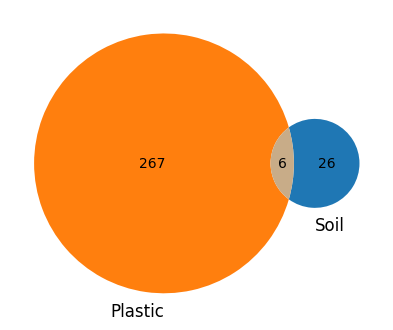

In [23]:
fig = plt.figure(figsize = (7,4))
venn2(subsets = ((len(set(one_amp["var1"] + one_amp["var2"]) - set(one_amc["var1"] + one_amc["var2"]))),
                (len(set(one_amc["var1"] + one_amc["var2"]) - set(one_amp["var1"] + one_amp["var2"]))),
                (len(set(one_amp["var1"] + one_amp["var2"]) & set(one_amc["var1"] + one_amc["var2"])))
                ),
      set_labels=("Plastic", "Soil"), 
          set_colors=("#ff7f0e", "#1f77b4"), alpha=1)

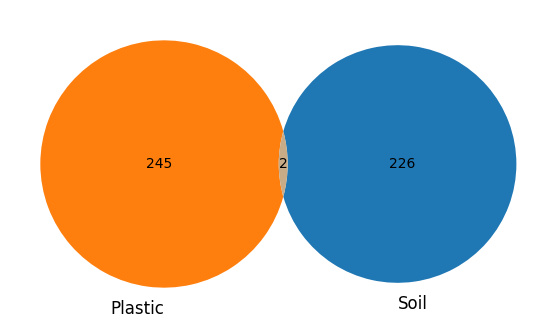

In [24]:
fig = plt.figure(figsize = (7,4))
venn2(subsets = ((len(set(one_zap["var1"] + one_zap["var2"]) - set(one_zac["var1"] + one_zac["var2"]))),
                (len(set(one_zac["var1"] + one_zac["var2"]) - set(one_zap["var1"] + one_zap["var2"]))),
                (len(set(one_zap["var1"] + one_zap["var2"]) & set(one_zac["var1"] + one_zac["var2"])))
                ),
      set_labels=("Plastic", "Soil"), 
          set_colors=("#ff7f0e", "#1f77b4"), alpha=1)

In [25]:
print("#### ZA ####")
print(stat.shapiro(sns_df.loc[(sns_df["type_g"] == "plas") & (sns_df["correlating"] == "z-a")]["coef"]))
print(stat.shapiro(sns_df.loc[(sns_df["type_g"] == "cont") & (sns_df["correlating"] == "z-a")]["coef"]))
print(stat.levene(sns_df.loc[(sns_df["type_g"] == "cont") & (sns_df["correlating"] == "z-a")]["coef"], sns_df.loc[(sns_df["type_g"] == "plas") & (sns_df["correlating"] == "z-a")]["coef"]))
print(stat.permutation_test((sns_df.loc[(sns_df["type_g"] == "cont") & (sns_df["correlating"] == "z-a")]["coef"], sns_df.loc[(sns_df["type_g"] == "plas") & (sns_df["correlating"] == "z-a")]["coef"]), 
                     statistic, n_resamples = 9999))
print("")

print("#### AM ####")
print(stat.shapiro(sns_df.loc[(sns_df["type_g"] == "plas") & (sns_df["correlating"] == "a-m")]["coef"]))
print(stat.shapiro(sns_df.loc[(sns_df["type_g"] == "cont") & (sns_df["correlating"] == "a-m")]["coef"]))
print(stat.levene(sns_df.loc[(sns_df["type_g"] == "cont") & (sns_df["correlating"] == "a-m")]["coef"], sns_df.loc[(sns_df["type_g"] == "plas") & (sns_df["correlating"] == "a-m")]["coef"]))
print(stat.permutation_test((sns_df.loc[(sns_df["type_g"] == "cont") & (sns_df["correlating"] == "a-m")]["coef"], sns_df.loc[(sns_df["type_g"] == "plas") & (sns_df["correlating"] == "a-m")]["coef"]), 
                     statistic, n_resamples = 9999))
print("")

#### ZA ####
ShapiroResult(statistic=0.959991069116758, pvalue=2.285663857549453e-06)
ShapiroResult(statistic=0.9260583390856263, pvalue=2.8530226913526123e-09)
LeveneResult(statistic=29.99907479115917, pvalue=7.033090404487987e-08)
PermutationTestResult(statistic=0.12696594236594183, pvalue=0.0002, null_distribution=array([0.00957165, 0.00959962, 0.00876318, ..., 0.00314254, 0.01240276,
       0.01191216]))

#### AM ####
ShapiroResult(statistic=0.9665302101718817, pvalue=5.534504892727455e-06)
ShapiroResult(statistic=0.400028050908102, pvalue=2.4776777477584173e-10)
LeveneResult(statistic=40.630370502485725, pvalue=6.841165566701706e-10)
PermutationTestResult(statistic=0.12538944659403328, pvalue=0.0002, null_distribution=array([ 0.00894726,  0.03460589,  0.01706581, ...,  0.00033742,
       -0.00780517,  0.02944029]))



In [26]:
print(sns_df.loc[sns_df["coef"] > 0.95].shape[0])
print("##### ZAP #####")
print(len(one_zap.loc[one_zap["coef"] > 0.95][["var1", "var2", "coef"]]))
print("##### ZAS #####")
print(len(one_zac.loc[one_zac["coef"] > 0.95][["var1", "var2", "coef"]]))
print("##### AMP #####")
print(len(one_amp.loc[one_amp["coef"] > 0.95][["var1", "var2", "coef"]]))
print("##### AMS #####")
print(len(one_amc.loc[one_amc["coef"] > 0.95][["var1", "var2", "coef"]]))

177
##### ZAP #####
11
##### ZAS #####
90
##### AMP #####
46
##### AMS #####
30


## SYNTHETIC ARGS
Same idea, but this one requires more careful filtering

In [27]:
os.chdir("../../data/metadata")

In [28]:
metadata = pd.read_csv("assay_metadata.csv", index_col = 0)
metadata.head()

,Assay,antib
6112,aacC2,Aminoglycoside
6113,aacA/aphD,Aminoglycoside
6114,aac(6')-II,Aminoglycoside
6115,aphA3,Aminoglycoside
6116,sat4,Aminoglycoside


In [29]:
os.chdir("../../results/Corr_res")

Now I need to FIX the information in antib before proceeding, then apply the synthetic/not classification AND THEN I can apply the information to my results

In [30]:
# First: MGEs are not needed, so I can drop them before they start generating problems
print(metadata["antib"].unique())
metadata = metadata[~metadata["antib"].isin(["Insertional", "Integrase", "MGE", "Plasmid", "Plasmid-inc", "Plasmid-rep", "Transposase"])]
print(metadata["antib"].unique())

['Aminoglycoside' 'Amphenicol' 'Vancomycin' 'Beta Lactam' 'MDR'
 'Trimethoprim' 'Other' 'Fluoroquinolone' 'MLSB' 'Tetracycline'
 'Insertional' 'Integrase' 'MGE' 'Plasmid' 'Plasmid-inc' 'Plasmid-rep'
 'Sulfonamide' 'Transposase']
['Aminoglycoside' 'Amphenicol' 'Vancomycin' 'Beta Lactam' 'MDR'
 'Trimethoprim' 'Other' 'Fluoroquinolone' 'MLSB' 'Tetracycline'
 'Sulfonamide']


In [31]:
# Now let's fix a couple of misassigned things
metadata.loc[metadata["Assay"] == "dfrA1", "antib"] = "Trimethoprim"
metadata.loc[metadata["Assay"] == "dfrA12", "antib"] = "Trimethoprim"
metadata.loc[metadata["antib"] == "Phenicol", "antib"] = "Amphenicol"
metadata.loc[metadata["antib"] == "MLSB", "antib"] = "Macrolide"

metadata.loc[metadata["Assay"] == "dfrA1"]

,Assay,antib
6292,dfrA1,Trimethoprim


In [32]:
# Here goes everything that isn't classified as "Other"
metadata.loc[metadata["antib"] == "Aminoglycoside", "synth"] = "Natural"
metadata.loc[metadata["antib"] == "Amphenicol", "synth"] = "Semi-synthetic"
metadata.loc[metadata["antib"] == "Beta Lactam", "synth"] = "Natural" #!
metadata.loc[metadata["antib"] == "Fluoroquinolone", "synth"] = "Synthetic"
metadata.loc[metadata["antib"] == "MDR", "synth"] = "Natural"
metadata.loc[metadata["antib"] == "Macrolide", "synth"] = "Natural" #!
metadata.loc[metadata["antib"] == "Sulfonamide", "synth"] = "Synthetic"
metadata.loc[metadata["antib"] == "Tetracycline", "synth"] = "Natural" #!
metadata.loc[metadata["antib"] == "Trimethoprim", "synth"] = "Synthetic"
metadata.loc[metadata["antib"] == "Vancomycin", "synth"] = "Natural"

# Here the "Other" ARGs get classified family by family
metadata.loc[(metadata["Assay"] == "ARR-3") | (metadata["Assay"] == "Arr2") , "synth"] = "Semi-synthetic"
metadata.loc[metadata["Assay"] == "bacA", "synth"] = "Natural"
metadata.loc[metadata["Assay"] == "fabK", "synth"] = "Synthetic"
metadata.loc[(metadata["Assay"] == "fosX") | (metadata["Assay"] == "fosb") , "synth"] = "Natural"
metadata.loc[(metadata["Assay"] == "mcr-1") | (metadata["Assay"] == "mcr-2") | (metadata["Assay"] == "pmrA") , "synth"] = "Natural"
metadata.loc[metadata["Assay"] == "nisB", "synth"] = "Natural"

metadata

,Assay,antib,synth
6112,aacC2,Aminoglycoside,Natural
6113,aacA/aphD,Aminoglycoside,Natural
6114,aac(6')-II,Aminoglycoside,Natural
6115,aphA3,Aminoglycoside,Natural
6116,sat4,Aminoglycoside,Natural
...,...,...,...
6489,dfrAB4,Trimethoprim,Synthetic
6490,dfrC,Trimethoprim,Synthetic
6491,dfrG,Trimethoprim,Synthetic
6492,dfrK,Trimethoprim,Synthetic


Now I can filter the correlation datasets using the values of the synth column

In [33]:
synths = metadata.loc[metadata["synth"] == "Synthetic"]["Assay"].unique()
semis = metadata.loc[metadata["synth"] == "Semi-synthetic"]["Assay"].unique()
naturals = metadata.loc[metadata["synth"] == "Natural"]["Assay"].unique()

print(synths)
print(semis)

['dfrA1' 'dfrA12' 'fabK' 'qnrA' 'norA' 'qepA_1_2' 'QnrB4' 'QnrS1_S3_S5'
 'QnrVC1_VC3_VC6' 'QnrVC4_VC5_VC7' 'qnrD' 'qnrS2' 'oqxA' 'qnrB46' 'sul2'
 'strB' 'folA' 'sulA/folP' 'sul1 NEW' 'sulIII' 'dfra14' 'dfra17' 'dfra7'
 'dfra21' 'dfra5' 'dfrA8' 'dfrA10' 'dfrA15' 'dfrA18' 'dfrA22' 'dfrA25'
 'dfrA27' 'dfrAB4' 'dfrC' 'dfrG' 'dfrK' 'dfrBmulti']
['catB3' 'catB8' 'ceoA' 'cmlA1' 'cmx(A)' 'catA1' 'qnrB-bob_resign' 'cmlA5'
 'floR' 'Arr2' 'ARR-3' 'cat' 'catA2' 'catA3' 'catB2' 'catB9' 'cat(pC221)'
 'catP' 'catQ' 'cmlV' 'fexA' 'optrA']


And let's just repeat the usual stuff

In [34]:
synth_zap = z_a_plas.loc[z_a_plas["var2"].isin(synths)]# I'm going back to this step to get the print of the descriptive stats
synth_zap = filter_and_describe(synth_zap, "ZAP")
synth_zac = z_a_cont.loc[z_a_cont["var2"].isin(synths)]
synth_zac = filter_and_describe(synth_zac, "ZAC")
print("")
synth_amp = a_m_plas.loc[a_m_plas["var1"].isin(synths)]# I'm going back to this step to get the print of the descriptive stats
synth_amp = filter_and_describe(synth_amp, "AMP")
synth_amc = a_m_cont.loc[a_m_cont["var1"].isin(synths)]
synth_amc = filter_and_describe(synth_amc, "AMC")

There's  642  strong corrs in  ZAP . Mean coef is  0.784  Median  0.774  Var  0.01
Without p-val filtering, there's  1547  strong corrs in  ZAP . Mean coef is  0.602  Median  0.59  Var  0.038
There's  781  strong corrs in  ZAC . Mean coef is  0.903  Median  0.897  Var  0.006
Without p-val filtering, there's  1905  strong corrs in  ZAC . Mean coef is  0.857  Median  0.857  Var  0.009

There's  837  strong corrs in  AMP . Mean coef is  0.861  Median  0.878  Var  0.009
Without p-val filtering, there's  964  strong corrs in  AMP . Mean coef is  0.822  Median  0.846  Var  0.019
There's  96  strong corrs in  AMC . Mean coef is  0.98  Median  0.985  Var  0.002
Without p-val filtering, there's  286  strong corrs in  AMC . Mean coef is  0.836  Median  0.857  Var  0.025


In [35]:
semi_zap = z_a_plas.loc[z_a_plas["var2"].isin(semis)]# I'm going back to this step to get the print of the descriptive stats
semi_zap = filter_and_describe(semi_zap, "ZAP")
semi_zac = z_a_cont.loc[z_a_cont["var2"].isin(semis)]
semi_zac = filter_and_describe(semi_zac, "ZAC")
print("")
semi_amp = a_m_plas.loc[a_m_plas["var1"].isin(semis)]# I'm going back to this step to get the print of the descriptive stats
semi_amp = filter_and_describe(semi_amp, "AMP")
semi_amc = a_m_cont.loc[a_m_cont["var1"].isin(semis)]
semi_amc = filter_and_describe(semi_amc, "AMC")

There's  477  strong corrs in  ZAP . Mean coef is  0.78  Median  0.768  Var  0.008
Without p-val filtering, there's  1047  strong corrs in  ZAP . Mean coef is  0.619  Median  0.623  Var  0.034
There's  462  strong corrs in  ZAC . Mean coef is  0.902  Median  0.897  Var  0.005
Without p-val filtering, there's  949  strong corrs in  ZAC . Mean coef is  0.871  Median  0.857  Var  0.007

There's  498  strong corrs in  AMP . Mean coef is  0.865  Median  0.875  Var  0.007
Without p-val filtering, there's  583  strong corrs in  AMP . Mean coef is  0.823  Median  0.855  Var  0.018
There's  49  strong corrs in  AMC . Mean coef is  0.979  Median  0.985  Var  0.002
Without p-val filtering, there's  132  strong corrs in  AMC . Mean coef is  0.865  Median  0.857  Var  0.017


In [36]:
synth_zap["type_g"] = "plas"
synth_zap["correlating"] = "z-a" #correlating: what did we originally correlate. Useful later to separate along the x axis different correlations
synth_zac["type_g"] = "cont"
synth_zac["correlating"] = "z-a"
synth_amp["type_g"] = "plas"
synth_amp["correlating"] = "a-m"
synth_amc["type_g"] = "cont"
synth_amc["correlating"] = "a-m"

semi_zap["type_g"] = "plas"
semi_zap["correlating"] = "z-a" #correlating: what did we originally correlate. Useful later to separate along the x axis different correlations
semi_zac["type_g"] = "cont"
semi_zac["correlating"] = "z-a"
semi_amp["type_g"] = "plas"
semi_amp["correlating"] = "a-m"
semi_amc["type_g"] = "cont"
semi_amc["correlating"] = "a-m"


interest_cols = ["coef", "type_g", "correlating"]
sns_df_synth = pd.concat([synth_zac[interest_cols], synth_zap[interest_cols]])
sns_df_synth = pd.concat([sns_df_synth, synth_amc[interest_cols]])
sns_df_synth = pd.concat([sns_df_synth, synth_amp[interest_cols]])

sns_df_semi = pd.concat([semi_zac[interest_cols], semi_zap[interest_cols]])
sns_df_semi = pd.concat([sns_df_semi, semi_amc[interest_cols]])
sns_df_semi = pd.concat([sns_df_semi, semi_amp[interest_cols]])

sns_df_synth.head()

,coef,type_g,correlating
50,0.955882,cont,z-a
169,1.000000,cont,z-a
170,0.985294,cont,z-a
212,0.955882,cont,z-a
215,1.000000,cont,z-a


In [39]:
##### AM ####
print("###### SHARED SYNTH AMPS #####")
print(set(synth_amp["var1"] + synth_amp["var2"]) & set(synth_amc["var1"] + synth_amc["var2"]))
print(len(set(synth_amp["var1"] + synth_amp["var2"]) & set(synth_amc["var1"] + synth_amc["var2"])))

##### ZA ####
print("###### SHARED SYNTH ZAP #####")
print(set(synth_zap["var1"] + synth_zap["var2"]) & set(synth_zac["var1"] + synth_zac["var2"]))
print(len(set(synth_zap["var1"] + synth_zap["var2"]) & set(synth_zac["var1"] + synth_zac["var2"])))

##### AM ####
print("###### SHARED SEMI AMP #####")
print(set(semi_amp["var1"] + semi_amp["var2"]) & set(semi_amc["var1"] + semi_amc["var2"]))
print(len(set(semi_amp["var1"] + semi_amp["var2"]) & set(semi_amc["var1"] + semi_amc["var2"])))
##### ZA ####
print("###### SHARED SEMI ZAP #####")
print(set(semi_zap["var1"] + semi_zap["var2"]) & set(semi_zac["var1"] + semi_zac["var2"]))
print(len(set(semi_zap["var1"] + semi_zap["var2"]) & set(semi_zac["var1"] + semi_zac["var2"])))


###### SHARED SYNTH AMPS #####
{'dfrA10tnpAg', 'QnrS1_S3_S5ISEfm1-Entero', 'sulA/folPIncN_rep', 'QnrS1_S3_S5tnpAf', 'QnrB4TN5', 'dfra21IncQ_oriT', 'sul2int1-a-marko', 'sul2ISAba3-Acineto', 'dfrA25IS613', 'sulA/folPISSm2-Xanthob', 'dfrA25ISEcp1', 'sulA/folPISEfm1-Entero', 'sul2IncN_rep', 'sulA/folPtnpAf', 'QnrB4ISAba3-Acineto', 'QnrB4tnpAg', 'qnrS2IncQ_oriT', 'qnrS2tnpAg', 'dfra21int1-a-marko', 'qnrS2ISSm2-Xanthob', 'sulA/folPint1-a-marko', 'sulA/folPISAba3-Acineto', 'dfra21IncHI2-smr0018', 'dfra21tnpAf', 'dfrA10IncQ_oriT', 'QnrB4IncHI2-smr0018', 'dfra21ISEfm1-Entero', 'sulA/folPIncHI2-smr0018', 'qnrS2IncHI2-smr0018', 'QnrS1_S3_S5TN5', 'qnrS2ISAba3-Acineto', 'QnrB4ISEfm1-Entero', 'QnrS1_S3_S5IncN_rep', 'sulA/folPtnpAg', 'QnrB4int1-a-marko', 'dfra21tnpAg', 'QnrS1_S3_S5IncHI2-smr0018', 'dfra14tra-A', 'dfrA10ISEfm1-Entero', 'sul2TN5', 'QnrS1_S3_S5int1-a-marko', 'qnrS2ISEfm1-Entero', 'sul2tnpAf', 'sulA/folPTN5', 'dfrA10TN5', 'norAIS630', 'qnrS2tnpAf', 'dfrA10tnpAf', 'QnrS1_S3_S5ISAba3-Acine

In [46]:
###### AM ######
print("In plastics and zOTUs, we can find ", sorted(list(synth_zap["var2"].unique())), " as synths, a total of ", len(list(synth_zap["var2"].unique())))
print("In the surrounding environment and zOTUs, we can find ", sorted(list(synth_zac["var2"].unique())), " as synths, a total of ", len(list(synth_zac["var2"].unique())))
print("This means that ", sorted(set(synth_zap["var2"].unique())- set(synth_zac["var2"].unique())), "(",len(set(synth_zap["var2"].unique())- set(synth_zac["var2"].unique())), ") are exclusive to plastics")
print("")
print("In plastics and MGEs, we can find ", sorted(list(synth_amp["var1"].unique())), " as synths, a total of ", len(list(synth_amp["var1"].unique())))
print("In the surrounding environment and MGEs, we can find ", sorted(list(synth_amc["var1"].unique())), " as synths, a total of ", len(list(synth_amc["var1"].unique())))
print("This means that ", sorted(set(synth_amp["var1"].unique())- set(synth_amc["var1"].unique())), "(",len(set(synth_amp["var1"].unique())- set(synth_amc["var1"].unique())), ") are exclusive to plastics")
print("#######################")
print("In plastics and zOTUs, we can find ", sorted(list(semi_zap["var2"].unique())), " as semis, a total of ", len(list(semi_zap["var2"].unique())))
print("In the surrounding environment and zOTUs, we can find ", sorted(list(semi_zac["var2"].unique())), " as semis, a total of ", len(list(semi_zac["var2"].unique())))
print("This means that ", sorted(set(semi_zap["var2"].unique())- set(semi_zac["var2"].unique())), "(",len(set(semi_zap["var2"].unique())- set(semi_zac["var2"].unique())), ") are exclusive to plastics")
print("")
print("In plastics and MGEs, we can find ", sorted(list(semi_amp["var1"].unique())), " as semis, a total of ", len(list(semi_amp["var1"].unique())))
print("In the surrounding environment and MGEs, we can find ", sorted(list(semi_amc["var1"].unique())), " as semis, a total of ", len(list(semi_amc["var1"].unique())))
print("This means that ", sorted(set(semi_amp["var1"].unique())- set(semi_amc["var1"].unique())), "(",len(set(semi_amp["var1"].unique())- set(semi_amc["var1"].unique())), ") are exclusive to plastics")

In plastics and zOTUs, we can find  ['QnrB4', 'QnrS1_S3_S5', 'QnrVC1_VC3_VC6', 'dfrA1', 'dfrA10', 'dfrA12', 'dfrA15', 'dfrA25', 'dfrA27', 'dfrA8', 'dfrAB4', 'dfrBmulti', 'dfrG', 'dfrK', 'dfra14', 'dfra17', 'dfra21', 'fabK', 'folA', 'norA', 'qepA_1_2', 'qnrS2', 'strB', 'sul1 NEW', 'sul2', 'sulA/folP']  as synths, a total of  26
In the surrounding environment and zOTUs, we can find  ['QnrB4', 'QnrS1_S3_S5', 'dfrA10', 'dfrA15', 'dfrA25', 'dfrAB4', 'dfrG', 'dfra14', 'dfra21', 'norA', 'oqxA', 'qnrS2', 'sul2', 'sulA/folP']  as synths, a total of  14
This means that  ['QnrVC1_VC3_VC6', 'dfrA1', 'dfrA12', 'dfrA27', 'dfrA8', 'dfrBmulti', 'dfrK', 'dfra17', 'fabK', 'folA', 'qepA_1_2', 'strB', 'sul1 NEW'] ( 13 ) are exclusive to plastics

In plastics and MGEs, we can find  ['QnrB4', 'QnrS1_S3_S5', 'QnrVC1_VC3_VC6', 'dfrA10', 'dfrA15', 'dfrA25', 'dfrA27', 'dfrA8', 'dfrAB4', 'dfrBmulti', 'dfrG', 'dfrK', 'dfra14', 'dfra17', 'dfra21', 'folA', 'norA', 'qepA_1_2', 'qnrS2', 'strB', 'sul1 NEW', 'sul2', 's

## CORE AND RANK ONE

In [64]:
core_one_zac = core_zac.loc[core_zac["var2"].isin(one_args)]
core_one_zap = core_zap.loc[core_zap["var2"].isin(one_args)]
print("There's ", core_one_zac.shape[0], "correlations of control core zOTUs with rank I ARGs")
print(core_one_zac)
print("There's ", core_one_zap.shape[0], "correlations of plastic core zOTUs with rank I ARGs")
print(core_one_zap)

There's  3 correlations of control core zOTUs with rank I ARGs
           var1  var2  statistic  p-val      coef type_g correlating
15304  zOTU_266  lnuB   4.373214  0.004  0.824621   cont         z-a
17431  zOTU_380  aadE   4.736300  0.004  0.844791   cont         z-a
17471  zOTU_380  lnuB   4.736300  0.008  0.844791   cont         z-a
There's  10 correlations of plastic core zOTUs with rank I ARGs
         var1    var2  statistic   p-val      coef type_g correlating
22927  zOTU_9  dfrA15   5.218625  0.0020  0.812696   plas         z-a
22928  zOTU_9  dfrA25   5.351851  0.0020  0.819565   plas         z-a
22956  zOTU_9    floR   3.676765  0.0040  0.700895   plas         z-a
22966  zOTU_9    mepA   3.149988  0.0060  0.644030   plas         z-a
22971  zOTU_9    mphA   3.996575  0.0100  0.730005   plas         z-a
22976  zOTU_9    norA   4.700516  0.0040  0.782389   plas         z-a
23008  zOTU_9    tetL   4.631070  0.0060  0.777844   plas         z-a
27046  zOTU_9    bacA   4.404321  0.0

### Fully correlated

There's the possibility that some zOTUs are correlated with ARGs, said ARGs with MGEs, and those MGEs with the original zOTUs, closing the circle. Let's check wether that's true or not. Shortest way of doing so is finding the limiting factor first: the correlaiton sheet variable wilth the smaller amount of values

In [92]:
from tqdm.notebook import tqdm

In [109]:
count = 0
final_df = pd.DataFrame(columns = ["zOTU", "MGE", "ARG"])
for ZOTU in tqdm(filt_zmp["var1"].unique()):
    #if count == 5: break
    #print(ZOTU)
    zotud_zmp = filt_zmp.loc[filt_zmp["var1"] == ZOTU]
    #print(mged_am3["ARG"].unique())
    ##
    for MGE in tqdm(zotud_zmp["var2"].unique(), leave=False):
        #print(ZOTU, " with ", MGE)
        mged_amp = filt_amp.loc[filt_amp["var2"] == MGE]
        #print(argd_za3["zotu"].unique())
        count += 1
        ###
        for ARG in mged_amp["var1"].unique():
            #print(ARG, " in ", MGE)
            argd_zap = filt_zap.loc[filt_zap["var2"] == ARG]
            #print(zotud_zm3["MGE"].unique())
            for ZOTU2 in argd_zap["var1"].unique():
                if ZOTU == ZOTU2: 
                    res_dict = {"zOTU": ZOTU, "MGE": MGE, "ARG": ARG}
                    res_df = pd.DataFrame.from_dict(res_dict, orient = "index")
                    final_df = pd.concat([final_df, res_df.T])#, ignore_index = True)
                    count += 1
                    #print(MGE, "--", ARG, "--", ZOTU, "--")
print(count)
print(len(final_df["zOTU"].unique()))
print(len(final_df["ARG"].unique()))
print(len(final_df["MGE"].unique()))
final_df.to_csv("full_circle_plas.csv", sep = ";")

  0%|          | 0/162 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

134238
129
228
44


I want to quickly extract some useful information out of this full circle df: How many core zOTUs? And ARGs? And MGEs?. And, also: how many ARG-MGE correlations are within those shared by plastics and soils

In [110]:
shared_arg_mge = set(filt_amp["var1"] + "+" + filt_amp["var2"]) & set(filt_amc["var1"] + "+" + filt_amc["var2"])
shared_df = final_df.copy(deep = True)
shared_df["shared"] = shared_df["ARG"] + "+" + shared_df["MGE"]
shared_df = shared_df[(shared_df["shared"].isin(shared_arg_mge))]
shared_df

,zOTU,MGE,ARG,shared
0,zOTU_1012,ISCR1,blaGOB,blaGOB+ISCR1
0,zOTU_1050,IS613,aph(3'')-ia,aph(3'')-ia+IS613
0,zOTU_1050,IS613,bexA/norM,bexA/norM+IS613
0,zOTU_1050,IS630,aac(6)-iv_ih,aac(6)-iv_ih+IS630
0,zOTU_1050,IS630,norA,norA+IS630
...,...,...,...,...
0,zOTU_99,tra-A,sugE,sugE+tra-A
0,zOTU_99,tra-A,vanRC4,vanRC4+tra-A
0,zOTU_99,traN,aph(3'')-ia,aph(3'')-ia+traN
0,zOTU_99,traN,bexA/norM,bexA/norM+traN


In [111]:
lala = final_df[(final_df["zOTU"].isin(plastic_core))]
print(lala["zOTU"].unique())
print(lala["ARG"].unique())
print(len(lala["ARG"].unique()))
print(lala.shape)
lala

['zOTU_114' 'zOTU_9']
['aac3-Via' 'aph4ib' 'ArmA' 'NDM new' 'QnrB4' 'QnrS1_S3_S5'
 'QnrVC1_VC3_VC6' 'VanB' 'aac(3)-Xab' 'aac(3)-ib' 'aac(3)-id_ie'
 'aac(3)-iid_iii_iif_iia_iie' 'aac(3)-xaa' "aac(6')-II" "aac(6')-Ib"
 "aac(6')I1" 'aac(6)-iic' 'aac(6)-ij' 'aac(6)-im' 'aac(6)-ir'
 'aac(6)-iv_ih' 'aac(6)-iw' 'aac(6)-iz' 'aadA10' 'aadA17' 'aadA2a'
 'aadA2b' 'aadA5' 'aadA6' 'aadA9' 'aadA_99' 'aadB' 'aadD' 'acc3-iva'
 'acrB' 'acrF' 'acrR' 'adeI' 'ampC' 'ampC/blaDHA' 'ant6-ia' "aph(3'')-ia"
 'aph3via' 'aph6ia' 'aphA3' 'aph_viii' 'apmA' 'arsA' 'beta_ccra'
 'bexA/norM' 'bl3_cpha' 'bla-L1' 'bla-SME' 'bla1' 'blaACC-1' 'blaCARB'
 'blaCMY' 'blaCTX-M' 'blaFOXnew' 'blaGES' 'blaGOB' 'blaHERA' 'blaIMI'
 'blaIMIR' 'blaLEN' 'blaMOX/blaCMY' 'blaOCH' 'blaOXA10' 'blaPAO/PDC'
 'blaPSE' 'blaROB' 'blaSHV-11' 'blaVIM' 'cadC' 'carB' 'cat' 'catA2'
 'catA3' 'catB3' 'catB9' 'catP' 'cefa_ampc' 'ceoA' 'cepA' 'cfiA' 'cfxA'
 'cmlA1' 'cmlA5' 'cmlV' 'cmx(A)' 'dfrA10' 'dfrA15' 'dfrA25' 'dfrA27'
 'dfrA8' 'dfrBmulti' 'dfrK' 

,zOTU,MGE,ARG
0,zOTU_114,intl3,aac3-Via
0,zOTU_114,intl3,aph4ib
0,zOTU_9,EAE_05855,ArmA
0,zOTU_9,EAE_05855,NDM new
0,zOTU_9,EAE_05855,QnrB4
...,...,...,...
0,zOTU_9,trfa,vat(A)
0,zOTU_9,trfa,vat(E)
0,zOTU_9,trfa,vatB
0,zOTU_9,trfa,vgaA


In [112]:
lala = final_df[(final_df["ARG"].isin(one_args))]
print(lala["ARG"].unique())
print(lala.shape)
lala

['norA' 'dfrA15' 'mepA' 'mphA' 'dfrA25' 'floR' 'tetL']
(4614, 3)


,zOTU,MGE,ARG
0,zOTU_1050,IS1247,norA
0,zOTU_1050,IS200b,norA
0,zOTU_1050,IS21-ISAs29,norA
0,zOTU_1050,IS3,norA
0,zOTU_1050,IS613,norA
...,...,...,...
0,zOTU_99,tra-A,norA
0,zOTU_99,traN,dfrA15
0,zOTU_99,traN,norA
0,zOTU_99,trfa,dfrA15


In [113]:
count = 0
final_df = pd.DataFrame(columns = ["zOTU", "MGE", "ARG"])
for ZOTU in tqdm(filt_zmc["var1"].unique()):
    #if count == 5: break
    #print(ZOTU)
    zotud_zmc = filt_zmc.loc[filt_zmc["var1"] == ZOTU]
    #print(mged_am3["ARG"].unique())
    ##
    for MGE in tqdm(zotud_zmc["var2"].unique(), leave=False):
        #print(ZOTU, " with ", MGE)
        mged_amc = filt_amc.loc[filt_amc["var2"] == MGE]
        #print(argd_za3["zotu"].unique())
        count += 1
        ###
        for ARG in mged_amc["var1"].unique():
            #print(ARG, " in ", MGE)
            argd_zac = filt_zac.loc[filt_zac["var2"] == ARG]
            #print(zotud_zm3["MGE"].unique())
            for ZOTU2 in argd_zac["var1"].unique():
                if ZOTU == ZOTU2: 
                    res_dict = {"zOTU": ZOTU, "MGE": MGE, "ARG": ARG}
                    res_df = pd.DataFrame.from_dict(res_dict, orient = "index")
                    final_df = pd.concat([final_df, res_df.T])#, ignore_index = True)
                    count += 1
                    #print(MGE, "--", ARG, "--", ZOTU, "--")
print(count)
print(len(final_df["zOTU"].unique()))
print(len(final_df["ARG"].unique()))
print(len(final_df["MGE"].unique()))
final_df.to_csv("full_circle_cont.csv", sep = ";")

  0%|          | 0/198 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

63313
176
72
12


In [114]:
shared_arg_mge = set(filt_amp["var1"] + "+" + filt_amp["var2"]) & set(filt_amc["var1"] + "+" + filt_amc["var2"])
shared_df = final_df.copy(deep = True)
shared_df["shared"] = shared_df["ARG"] + "+" + shared_df["MGE"]
shared_df = shared_df[(shared_df["shared"].isin(shared_arg_mge))]
shared_df

,zOTU,MGE,ARG,shared
0,zOTU_1005,ISAba3-Acineto,apmA,apmA+ISAba3-Acineto
0,zOTU_1005,ISAba3-Acineto,bla-SME,bla-SME+ISAba3-Acineto
0,zOTU_1005,ISAba3-Acineto,blaCTX-M,blaCTX-M+ISAba3-Acineto
0,zOTU_1005,ISAba3-Acineto,blaGES,blaGES+ISAba3-Acineto
0,zOTU_1005,ISAba3-Acineto,blaHERA,blaHERA+ISAba3-Acineto
...,...,...,...,...
0,zOTU_991,tnpAg,vanRB,vanRB+tnpAg
0,zOTU_991,tnpAg,vanTG,vanTG+tnpAg
0,zOTU_991,tnpAg,vanWB,vanWB+tnpAg
0,zOTU_991,tnpAg,vat(E),vat(E)+tnpAg
